/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/u

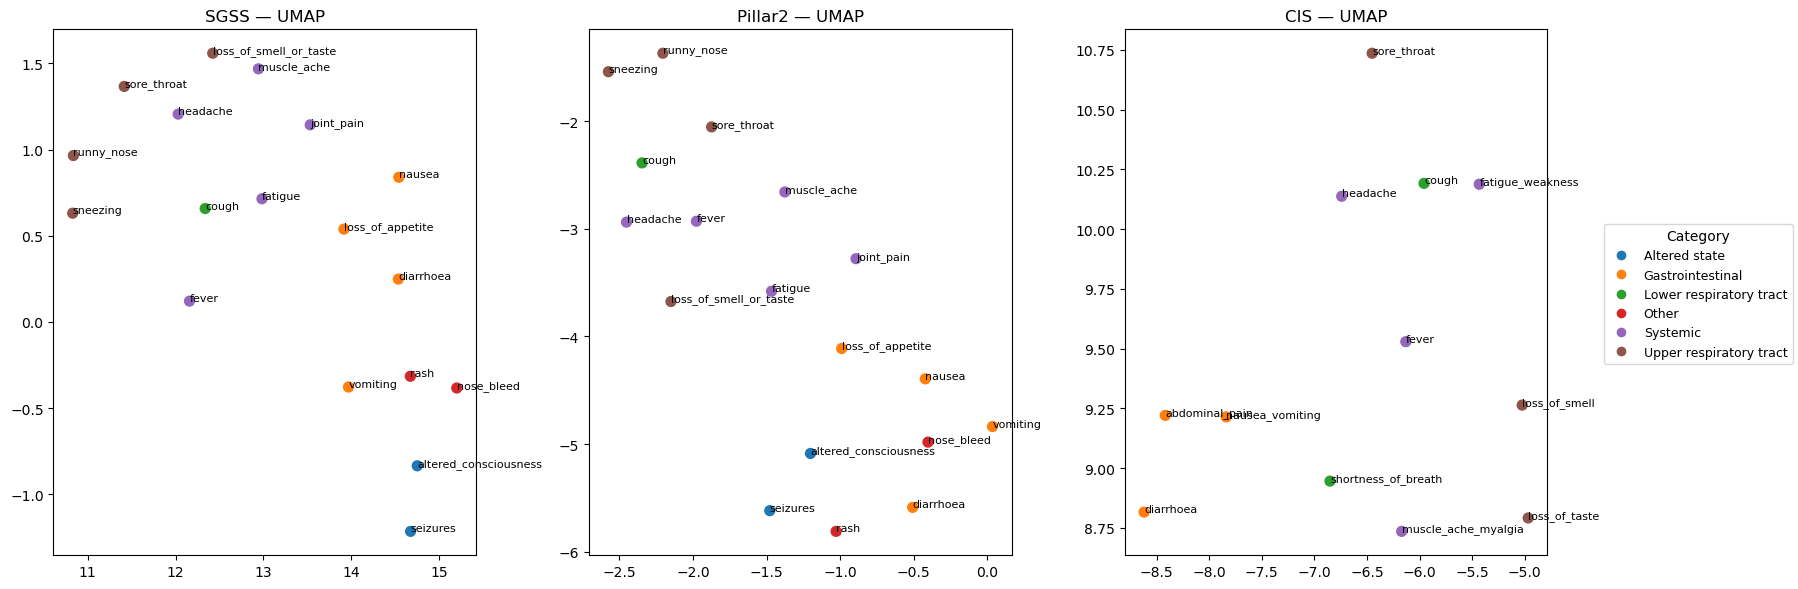

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import umap

# read jaccard matrix
sgss = pd.read_csv("/Users/liumeicheng/Desktop/SGSS.csv", index_col=0)
pillar2 = pd.read_csv("/Users/liumeicheng/Desktop/Pillar2.csv", index_col=0)
cis = pd.read_csv("/Users/liumeicheng/Desktop/CIS.csv", index_col=0)

# read symptom_category
sgss_cat = pd.read_csv("/Users/liumeicheng/Desktop/symptom_category_SGSS.csv")
pillar2_cat = pd.read_csv("/Users/liumeicheng/Desktop/symptom_category_Pillar2.csv")
cis_cat = pd.read_csv("/Users/liumeicheng/Desktop/symptom_category_CIS.csv")

# merge all categories and establish a global category set
all_categories = pd.concat([sgss_cat, pillar2_cat, cis_cat])["category"].unique()
cmap = plt.get_cmap("tab10")
color_map = {cat: cmap(i % 10) for i, cat in enumerate(sorted(all_categories))}

# generate color map
def get_colors(labels, cat_df):
    return [color_map[cat_df.set_index("symptom").loc[s, "category"]] for s in labels]

datasets = [
    ("SGSS", sgss, sgss_cat),
    ("Pillar2", pillar2, pillar2_cat),
    ("CIS", cis, cis_cat)
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, jaccard, cat_df) in zip(axes, datasets):
    labels = jaccard.index.tolist()
    colors = get_colors(labels, cat_df)

    reducer = umap.UMAP(
        n_neighbors=5,
        min_dist=0.1,
        metric="precomputed",
        random_state=42
    )
    embedding = reducer.fit_transform(jaccard.values)

    ax.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=50)

    # adding symptom labels
    for i, txt in enumerate(labels):
        ax.text(embedding[i, 0], embedding[i, 1], txt, fontsize=8)

    ax.set_title(f"{name} — UMAP")

# adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cat,
                      markerfacecolor=color_map[cat], markersize=8)
           for cat in sorted(all_categories)]
fig.legend(handles=handles, title="Category", loc="center right", fontsize=9)

plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()


/var/folders/y3/21k10zb17kj5c1bhhfk39fcc0000gn/T/ipykernel_90904/923512696.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(jaccard, method="average")
/var/folders/y3/21k10zb17kj5c1bhhfk39fcc0000gn/T/ipykernel_90904/923512696.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(jaccard, method="average")
/var/folders/y3/21k10zb17kj5c1bhhfk39fcc0000gn/T/ipykernel_90904/923512696.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(jaccard, method="average")


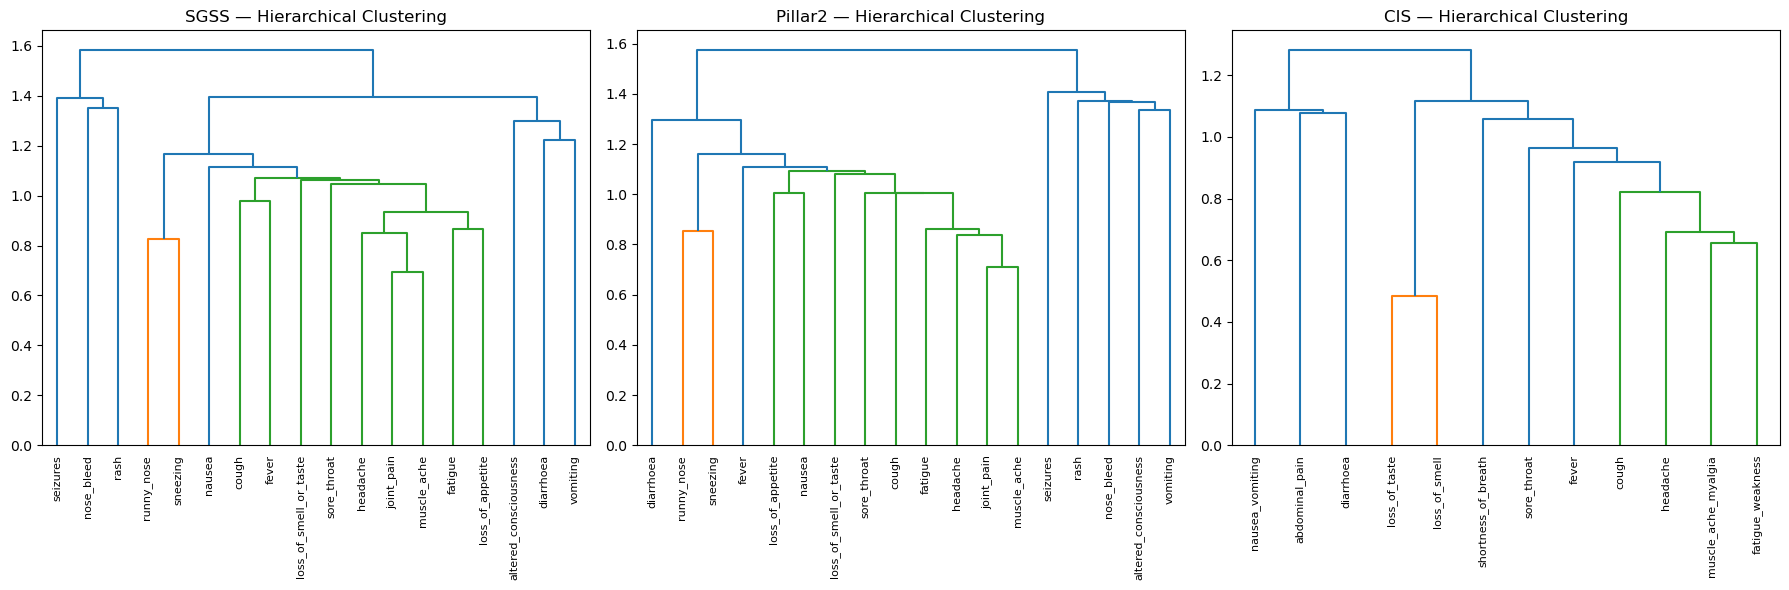

In [86]:
import scipy.cluster.hierarchy as sch

datasets = [
    ("SGSS", sgss),
    ("Pillar2", pillar2),
    ("CIS", cis)
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, jaccard) in zip(axes, datasets):
    # using jaccard distance matrix for linkage
    linkage_matrix = sch.linkage(jaccard, method="average")
    
    sch.dendrogram(
        linkage_matrix,
        labels=jaccard.index.tolist(),
        leaf_rotation=90,
        leaf_font_size=8,
        ax=ax
    )
    ax.set_title(f"{name} — Hierarchical Clustering")

plt.tight_layout()
plt.show()


/var/folders/y3/21k10zb17kj5c1bhhfk39fcc0000gn/T/ipykernel_90904/3742898718.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


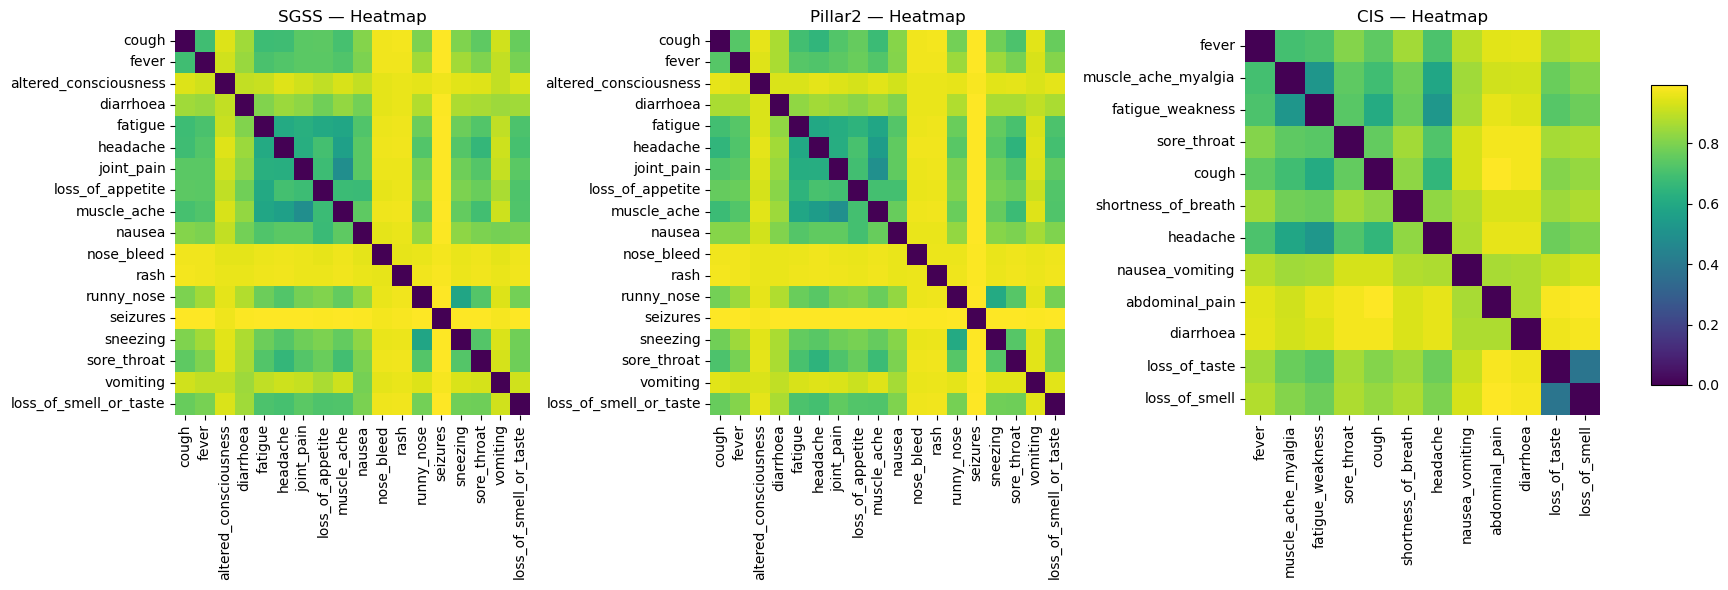

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# heatmap
heatmaps = []
for ax, (name, jaccard) in zip(axes, datasets):
    hm = sns.heatmap(
        jaccard,
        cmap="viridis",
        ax=ax,
        cbar=False  # to avoid each subplot has a colorbar
    )
    ax.set_title(f"{name} — Heatmap")
    heatmaps.append(hm)

# share one colorbar
cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.5])  # [left, bottom, width, height]
fig.colorbar(heatmaps[0].collections[0], cax=cbar_ax)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()